In [1]:
import subprocess
import pandas as pd
import codecs
import re

In [2]:
datas = pd.read_csv(open("mizunami.csv", 'rU'), encoding='utf-8')
#datas = pd.read_csv(open("shibuya.csv", 'rU'), encoding='utf-8')

/Users/a0082273/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 'U' mode is deprecated
  """Entry point for launching an IPython kernel.


In [3]:
datas

,Unnamed: 0,time,id,name,text
0,0,Thu Jul 05 23:36:20 +0000 2018,gifu_sef,岐阜セフレ募集【裏垢】＠相互,★岐阜セフレ募集情報更新！\n\n内容：今から生射精エッチしませんか？欲求不満、レスの人いま...
1,1,Thu Jul 05 23:29:12 +0000 2018,akito1123,AKITO,19号朝から追突事故か〜💦\n釜戸駅超えてちょっと恵那方面行くと恵那から瑞浪車線でハイエース...
2,2,Thu Jul 05 23:27:02 +0000 2018,jr313_8000bot,313系8000番台bot,|ホームライナー|瑞浪
3,3,Thu Jul 05 23:15:27 +0000 2018,gifu_sf,岐阜セフレ募集,★岐阜セフレ募集情報更新！\n\n内容：お１人だけ、私のエッチな火遊びにお付き合いして下さる...
4,4,Thu Jul 05 23:06:20 +0000 2018,Patchouli_MR,パチュリー・ミノーレッジ,ホームライナー瑞浪2号は朝に瑞浪駅始発で運行されるホームライナーよ。昔は名古屋始発のホームラ...
5,5,Thu Jul 05 23:04:16 +0000 2018,kuwakuwamarikit,まりきち,@miruku_news ( *・ω・)ノやあ、久しぶり。一昨日は2時間で終わって、昨日は瑞...
6,6,Thu Jul 05 22:58:23 +0000 2018,Meiekibell_bot,名古屋駅のベルBot Ver1.0,ﾋﾟｬｰｰｰ---ｰｰｰｰ(ﾋﾟﾝ ﾎﾟﾝ まもなく 8番線から 快速 瑞浪行きが 発車しま...
7,7,Thu Jul 05 22:33:35 +0000 2018,t_nobukatsu,武田太郎信勝,天正２年（１５７４年）１月２７日、東美濃に侵攻した父が明智城（恵那市）を包囲したとの報が織田...
8,8,Thu Jul 05 22:12:17 +0000 2018,gifu_sf,岐阜セフレ募集,★岐阜セフレ募集速報！\n\n内容：エッチしたいナ❤すぐホテルに連れてってくれる方を希望して...
9,9,Thu Jul 05 21:06:59 +0000 2018,lepton0726,れぷとん＠心霊スポット最前線(半bot),#岐阜心霊スポット【No.1126:エロ本小屋】岐阜県瑞浪市日吉町にある廃屋。名称は裁断され...


In [4]:
datas = datas.drop('Unnamed: 0', axis=1)
datas

,time,id,name,text
0,Thu Jul 05 23:36:20 +0000 2018,gifu_sef,岐阜セフレ募集【裏垢】＠相互,★岐阜セフレ募集情報更新！\n\n内容：今から生射精エッチしませんか？欲求不満、レスの人いま...
1,Thu Jul 05 23:29:12 +0000 2018,akito1123,AKITO,19号朝から追突事故か〜💦\n釜戸駅超えてちょっと恵那方面行くと恵那から瑞浪車線でハイエース...
2,Thu Jul 05 23:27:02 +0000 2018,jr313_8000bot,313系8000番台bot,|ホームライナー|瑞浪
3,Thu Jul 05 23:15:27 +0000 2018,gifu_sf,岐阜セフレ募集,★岐阜セフレ募集情報更新！\n\n内容：お１人だけ、私のエッチな火遊びにお付き合いして下さる...
4,Thu Jul 05 23:06:20 +0000 2018,Patchouli_MR,パチュリー・ミノーレッジ,ホームライナー瑞浪2号は朝に瑞浪駅始発で運行されるホームライナーよ。昔は名古屋始発のホームラ...
5,Thu Jul 05 23:04:16 +0000 2018,kuwakuwamarikit,まりきち,@miruku_news ( *・ω・)ノやあ、久しぶり。一昨日は2時間で終わって、昨日は瑞...
6,Thu Jul 05 22:58:23 +0000 2018,Meiekibell_bot,名古屋駅のベルBot Ver1.0,ﾋﾟｬｰｰｰ---ｰｰｰｰ(ﾋﾟﾝ ﾎﾟﾝ まもなく 8番線から 快速 瑞浪行きが 発車しま...
7,Thu Jul 05 22:33:35 +0000 2018,t_nobukatsu,武田太郎信勝,天正２年（１５７４年）１月２７日、東美濃に侵攻した父が明智城（恵那市）を包囲したとの報が織田...
8,Thu Jul 05 22:12:17 +0000 2018,gifu_sf,岐阜セフレ募集,★岐阜セフレ募集速報！\n\n内容：エッチしたいナ❤すぐホテルに連れてってくれる方を希望して...
9,Thu Jul 05 21:06:59 +0000 2018,lepton0726,れぷとん＠心霊スポット最前線(半bot),#岐阜心霊スポット【No.1126:エロ本小屋】岐阜県瑞浪市日吉町にある廃屋。名称は裁断され...


In [5]:
improper_words  = ['bot', 'セフレ', '情報', '案内', '相互', '出会', '法人', '空き家オールバンク']
for col in range(datas.shape[0]):
    for word in improper_words:
        if str(word) in datas['name'][col].lower():
            datas = datas.drop(col, axis=0)
            break

In [6]:
#for col in range(datas.shape[0]):
#    if 'bot' in datas['name'][col].lower():
#        datas = datas.drop(col, axis=0)
#    elif 'セフレ' in datas['name'][col]:
#        datas = datas.drop(col, axis=0)
#    elif '情報' in datas['name'][col]:
#        datas = datas.drop(col, axis=0)
#    elif '案内' in datas['name'][col]:
#        datas = datas.drop(col, axis=0)
#    elif '相互' in datas['name'][col]:
#        datas = datas.drop(col, axis=0)
#    elif '出会' in datas['name'][col]:
#        datas = datas.drop(col, axis=0)
#    elif '法人' in datas['name'][col]:
#        datas = datas.drop(col, axis=0)
#    elif '空き家オールバンク' in datas['name'][col]:
#        datas = datas.drop(col, axis=0)
#    elif '' in datas['name'][col]:
#        datas = datas.drop(col, axis=0)

In [7]:
datas = datas.reset_index(drop=True)

In [8]:
pd.set_option("display.max_rows", 300)  #表示する行数を増やす
datas

,time,id,name,text
0,Thu Jul 05 23:29:12 +0000 2018,akito1123,AKITO,19号朝から追突事故か〜💦\n釜戸駅超えてちょっと恵那方面行くと恵那から瑞浪車線でハイエース...
1,Thu Jul 05 23:06:20 +0000 2018,Patchouli_MR,パチュリー・ミノーレッジ,ホームライナー瑞浪2号は朝に瑞浪駅始発で運行されるホームライナーよ。昔は名古屋始発のホームラ...
2,Thu Jul 05 23:04:16 +0000 2018,kuwakuwamarikit,まりきち,@miruku_news ( *・ω・)ノやあ、久しぶり。一昨日は2時間で終わって、昨日は瑞...
3,Thu Jul 05 22:33:35 +0000 2018,t_nobukatsu,武田太郎信勝,天正２年（１５７４年）１月２７日、東美濃に侵攻した父が明智城（恵那市）を包囲したとの報が織田...
4,Thu Jul 05 20:58:09 +0000 2018,Timelor75952424,Timelord,皆様、おはようございますm(_ _)m今日も雨で危険地域が増えています。危ないところには近づ...
5,Thu Jul 05 18:44:02 +0000 2018,_F462323,林 / F.A$$A$$1N a.k.a POLICE,今では逆に瑞浪が平和 https://t.co/O0eYy5E3uq
6,Thu Jul 05 17:39:20 +0000 2018,yskmas_k_66,アザラシ提督,ヒゲクジラ：復元画公開 中学校造成現場で発見 イサナセタス属と特定 きょうから瑞浪市化石博物...
7,Thu Jul 05 15:46:19 +0000 2018,yamamoto1972,やっぱり猫が好き,ﾄﾞﾗｺｺ! 岐阜県瑞浪市釜戸町 [ドラココなう！iPhone] #doracoconow ...
8,Thu Jul 05 15:35:43 +0000 2018,Riz_wolf,NOHA(リズ),@Negitoro1109 \nいるよ～\nこの前、瑞浪の川でオオサンショウウオが見つかった...
9,Thu Jul 05 15:16:21 +0000 2018,nb8QI0VmVcyc7M0,みく,なぜ瑞浪だけちょっと違うのか https://t.co/sksLZlwHOw


In [9]:
for i in range(datas.shape[0]):
    if type(datas.text[i]) != str:
        print(i)

In [10]:
import MeCab
m = MeCab.Tagger("-d /usr/local/lib/mecab/dic/mecab-ipadic-neologd/")
word_list = []
for i in range(datas.shape[0]):
    if type(datas.text[i]) == str:
        texts = m.parse(datas['text'][i])
        texts = texts.split('\n')
        for text in texts:
            text = re.split('[\t,]', text)
            if text[0] == 'EOS' or text[0] == '':
                pass
            elif text[1] == '名詞' and text[2] == '一般': 
                word_list.append(text[0])
            elif text[1] == '名詞' and text[2] == '地域': 
                word_list.append(text[0])
            elif text[1] == '形容詞' and text[2] == '自立': 
                word_list.append(text[0])            

In [11]:
word_list

['事故',
 '💦',
 '方面',
 '車線',
 '席',
 '始発',
 '始発',
 '無い',
 '久しぶり',
 '全域',
 'w',
 '部活',
 'ﾟ',
 'ﾟ',
 'ﾟ',
 'ﾟ',
 '父',
 '報',
 '父',
 '神',
 '箆',
 '兵',
 '代替わり',
 '皆様',
 '雨',
 '危ない',
 '方面',
 '方面',
 '視界',
 '狭い',
 'では',
 '逆',
 'eYy',
 '中学校',
 '現場',
 'イサナセタス',
 'ﾄﾞﾗｺｺ',
 'ドラココ',
 'なう',
 'よ～',
 '川',
 '雨',
 '雨',
 '地元',
 '天候',
 '気',
 'bbdPpWJRY',
 'i',
 '秋',
 '垂水',
 '😃',
 '衣装',
 'いい',
 'シリーズ',
 '大きい',
 '狛犬',
 '白目',
 '方角',
 '道路',
 'yLtiLx',
 'in',
 'iTVDlAx',
 'カート',
 'ミーティング',
 'シリーズ',
 'ー',
 'zvGRVRN',
 '声',
 '東部',
 'チューブ',
 'ない',
 '別',
 'ほしく',
 '良く',
 '中央',
 'いもち',
 'タレ',
 'チューブ',
 '父',
 '久しぶり',
 'いもち',
 'くるみ',
 '味噌',
 '絶品',
 '名物',
 'あま',
 '本店',
 'jXaGZ',
 '中央',
 'テレビ',
 'バイト',
 'くるみ',
 'りご',
 '美味し',
 '中央',
 'きた',
 'ー',
 'ｗｗｗ',
 'ゃるんだぁ',
 '🙀',
 '陸上',
 '教室',
 'ハードル',
 '祭り',
 '💭',
 '祭り',
 '♥',
 '♥',
 '♥',
 '大会',
 'いい',
 '方面',
 '最終',
 '列車',
 'カート',
 'ミーティング',
 'シリーズ',
 'ー',
 '🚏',
 '緑色',
 'ピンク色',
 '地区',
 'バサラカーニバル',
 '言',
 'BI',
 'パンフ',
 '小冊子',
 '日本一',
 '暑い',
 '夏',
 'チーム',
 '農林',
 '工',
 '商',
 '南',
 '工',

In [12]:
from collections import Counter

counter = Counter(word_list)
for word, cnt in counter.most_common():
    print(word, cnt)

in 31
バサラカーニバル 26
ー 15
ない 15
チーム 15
方面 13
祭り 12
イベント 12
バサカニ 12
地元 11
東方 11
夢 11
ジョジョ 11
中学校 10
イサナセタス 10
現場 9
いい 9
大会 8
生徒 8
投手 7
動画 7
場所 7
始発 6
気 6
列車 6
地区 6
高校 6
上り 6
人 6
楽しい 6
とこ 6
無い 5
シリーズ 5
最終 5
歌 5
出て 5
☺ 5
快速 5
次 5
冬 5
ﾟ 4
雨 4
暑い 4
夏 4
商 4
南 4
小学校 4
多い 4
スティック 4
情報 4
交差点 4
楽しみ 4
全日本 4
店 4
カニ 4
早く 4
面白い 4
hMk 4
ホップ 4
父 3
なう 3
カート 3
中央 3
ｗｗｗ 3
♥ 3
工 3
他 3
大雨 3
瑞 3
市民 3
絆 3
粘土 3
瀬戸 3
踊り 3
軒先 3
商品 3
ニュース 3
学校 3
ブースター 3
感じ 3
外 3
市立 3
七夕 3
懐かしい 3
y 3
博物館 3
O 3
いって 3
男子 3
遠い 3
近い 3
事 3
番台 3
リスト 3
センター 3
レ 3
ＥＦ 3
車 3
マシュマロ 3
実家 3
皆さん 3
本 3
演舞 3
草 3
犯人 3
方向 3
予選 3
決勝 3
写真 3
事故 2
席 2
久しぶり 2
全域 2
神 2
箆 2
皆様 2
では 2
逆 2
ﾄﾞﾗｺｺ 2
ドラココ 2
😃 2
道路 2
ミーティング 2
声 2
東部 2
チューブ 2
別 2
良く 2
いもち 2
くるみ 2
本店 2
きた 2
🚏 2
地下 2
市 2
こま犬 2
大気 2
状態 2
害 2
体育館 2
市内 2
ww 2
縁 2
zL 2
レッスン 2
お越し 2
Z 2
新しい 2
記事 2
まつり 2
👍 2
時点 2
スクーリング 2
休み 2
花崗岩 2
メイン 2
バル 2
陣 2
かー 2
作品 2
一般 2
選手 2
ﾉ 2
厚生 2
病院 2
男性 2
家 2
人口 2
街 2
床屋 2
ジャック 2
うち 2
体育 2
辺り 2
キリシタン 2
遺跡 2
あと 2
楽し 2
かや 2
先 2
詰め合わせ 2
気持ち 2
ゴルフ 2
倶楽部 2
地域 2
各種 2
フェスティカ 2
定刻 2

In [13]:
#stop_words = [ u'情報', u'アカウント', u'地域', u'年齢', u'名前', u'内容', u'ない', u'in',
#              u'欄', u'付近', u'童貞', u'ー', u'多い', u'口コミ', u'出会い', u'評判', u'方法',
#              u'方い', u'無い', u'bot', u'H', u'法人', u'EF', u'女性', u'男性', u'ﾟ']
stop_words = [ u'in', u'ー', u'bot', u'H', u'EF', u'ﾟ']

def remove_specified_values(arr, value):
    while value in arr:
        arr.remove(value)

for word in stop_words:
    remove_specified_values(word_list, word)

In [14]:
counter = Counter(word_list)
for word, cnt in counter.most_common():
    print(word, cnt)

バサラカーニバル 26
ない 15
チーム 15
方面 13
祭り 12
イベント 12
バサカニ 12
地元 11
東方 11
夢 11
ジョジョ 11
中学校 10
イサナセタス 10
現場 9
いい 9
大会 8
生徒 8
投手 7
動画 7
場所 7
始発 6
気 6
列車 6
地区 6
高校 6
上り 6
人 6
楽しい 6
とこ 6
無い 5
シリーズ 5
最終 5
歌 5
出て 5
☺ 5
快速 5
次 5
冬 5
雨 4
暑い 4
夏 4
商 4
南 4
小学校 4
多い 4
スティック 4
情報 4
交差点 4
楽しみ 4
全日本 4
店 4
カニ 4
早く 4
面白い 4
hMk 4
ホップ 4
父 3
なう 3
カート 3
中央 3
ｗｗｗ 3
♥ 3
工 3
他 3
大雨 3
瑞 3
市民 3
絆 3
粘土 3
瀬戸 3
踊り 3
軒先 3
商品 3
ニュース 3
学校 3
ブースター 3
感じ 3
外 3
市立 3
七夕 3
懐かしい 3
y 3
博物館 3
O 3
いって 3
男子 3
遠い 3
近い 3
事 3
番台 3
リスト 3
センター 3
レ 3
ＥＦ 3
車 3
マシュマロ 3
実家 3
皆さん 3
本 3
演舞 3
草 3
犯人 3
方向 3
予選 3
決勝 3
写真 3
事故 2
席 2
久しぶり 2
全域 2
神 2
箆 2
皆様 2
では 2
逆 2
ﾄﾞﾗｺｺ 2
ドラココ 2
😃 2
道路 2
ミーティング 2
声 2
東部 2
チューブ 2
別 2
良く 2
いもち 2
くるみ 2
本店 2
きた 2
🚏 2
地下 2
市 2
こま犬 2
大気 2
状態 2
害 2
体育館 2
市内 2
ww 2
縁 2
zL 2
レッスン 2
お越し 2
Z 2
新しい 2
記事 2
まつり 2
👍 2
時点 2
スクーリング 2
休み 2
花崗岩 2
メイン 2
バル 2
陣 2
かー 2
作品 2
一般 2
選手 2
ﾉ 2
厚生 2
病院 2
男性 2
家 2
人口 2
街 2
床屋 2
ジャック 2
うち 2
体育 2
辺り 2
キリシタン 2
遺跡 2
あと 2
楽し 2
かや 2
先 2
詰め合わせ 2
気持ち 2
ゴルフ 2
倶楽部 2
地域 2
各種 2
フェスティカ 2
定刻 2
📷 2
エリア 2
駅前 2

In [15]:
word_list = ' '.join(word_list)

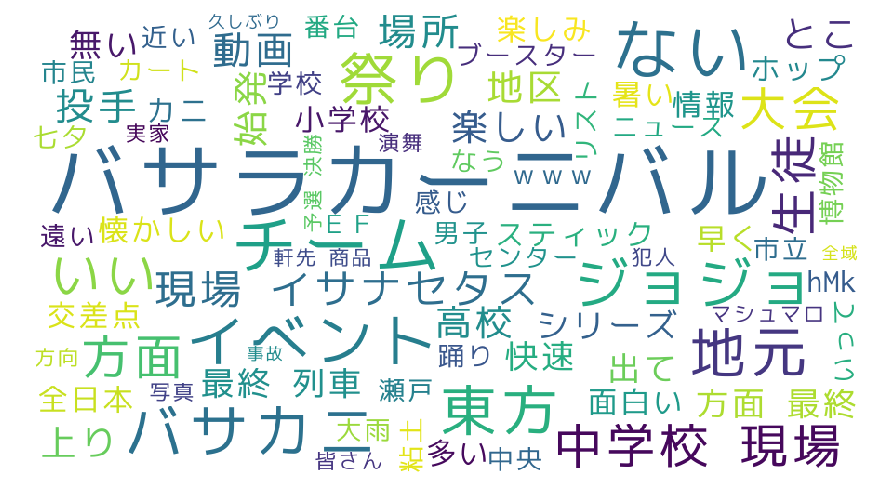

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

fpath = "~/Library/Fonts/RictyDiminished-Regular.ttf"

wordcloud = WordCloud(background_color="white", font_path=fpath, width=900, height=500, max_words=80).generate(word_list)

plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis("off")
#plt.savefig('shibuya.png')
plt.savefig('mizunami.png')
plt.show()